# NLP Sentiment Analysis Assigment

In [4]:
#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [5]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martinlane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinlane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/martinlane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Data

In [6]:
data = pd.read_csv("train.tsv",sep="\t")
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
data.Sentiment.unique()

array([1, 2, 3, 4, 0])

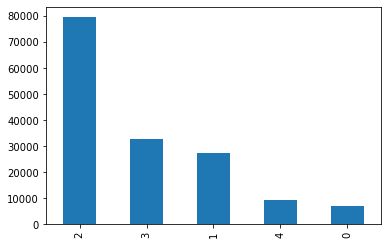

In [8]:
data.Sentiment.value_counts().plot.bar()

In [9]:
data["Sentiment"].replace(0,value = "negative",inplace=True)
data["Sentiment"].replace(1,value = "negative",inplace=True)

In [10]:
data["Sentiment"].replace(3,value = "positive",inplace=True)
data["Sentiment"].replace(4,value = "positive",inplace=True)

In [11]:
data.shape

(156060, 4)

In [12]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [13]:
data = data[data["Sentiment"]!=2]

In [14]:
data.shape

(76478, 4)

In [17]:
data.sample(10)

,PhraseId,SentenceId,Phrase,Sentiment
95717,95718,4999,be engaging,positive
92925,92926,4840,tolerable-to-adults lark of a movie,negative
68838,68839,3496,impart a message,positive
48330,48331,2358,when none of them are ever any good,negative
70694,70695,3603,is solid,positive
88520,88521,4599,enjoyable in its own right,positive
97442,97443,5096,around some intriguing questions about the dif...,positive
62574,62575,3165,In Auteil 's less dramatic but equally incisiv...,positive
64802,64803,3282,"If it were any more of a turkey , it would gob...",negative
109640,109641,5809,is labored,negative


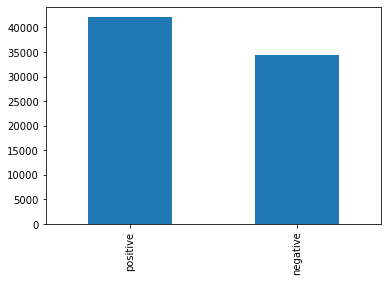

In [18]:
data.Sentiment.value_counts().plot.bar()

In [37]:
df = pd.DataFrame()

df["sentences"] = data["Phrase"]
df["label"] = data["Sentiment"]

In [38]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [39]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-100:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [40]:
rare_words

Millions     1
Mama         1
flux         1
Pelosi       1
jumpsuit     1
            ..
Greg         1
liberally    1
U.           1
Matters      1
ropes        1
Length: 100, dtype: int64

In [43]:
df.shape

(76478, 2)

In [42]:
## Text Preprocessing

In [44]:
# **Word Tokenization and lowercase**
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [45]:
df.head()

,sentences,label
0,series escapade demonstrating adage good goose...,negative
21,good goose,positive
22,good,positive
33,gander occasionally amuses none amount much story,negative
46,amuses,positive


In [46]:
df.iloc[0]

sentences    series escapade demonstrating adage good goose...
label                                                 negative
Name: 0, dtype: object

In [47]:
# Train Test Split

In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["sentences"],
                                                                   df["label"], 
                                                                    random_state = 1)

In [49]:
X_train.head()

118788    present fascinating glimpse urban life class w...
89514     hey everybody wan na watch movie guy dressed c...
86857                               incredible number story
140626                         ultimately disappoint action
153243                                              unified
Name: sentences, dtype: object

In [50]:
encoder = preprocessing.LabelEncoder()

In [56]:
y_train = encoder.fit_transform(y_train)

In [57]:
y_test = encoder.transform(y_test)

In [58]:
y_train[0:5]

array([1, 0, 1, 0, 1])

In [59]:
y_test[0:5]

array([1, 0, 1, 0, 0])

In [60]:
## Count Vectors

In [61]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [62]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [63]:
vectorizer.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [64]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
## TF-IDF

In [66]:
tf_idf_word_vec = TfidfVectorizer()
tf_idf_word_vec.fit(X_train)

TfidfVectorizer()

In [67]:
X_train_tfidf = tf_idf_word_vec.transform(X_train)
X_test_tfidf = tf_idf_word_vec.transform(X_test)

In [68]:
tf_idf_word_vec.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [69]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
a = pd.DataFrame(X_train_tfidf.toarray())

In [72]:
pd.set_option('display.max_columns', 1000)

In [73]:
a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293,12294,12295,12296,12297,12298,12299,12300,12301,12302,12303,12304,12305,12306,12307,12308,12309,12310,12311,12312,12313,12314,12315,12316,12317,12318,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329,12330,12331,12332,12333,12334,12335,12336,12337,12338,12339,12340,12341,12342,12343,12344,12345,12346,12347,12348,12349,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359,12360,12361,12362,12363,12364,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398,12399,12400,12401,12402,12403,12404,12405,12406,12407,12408,12409,12410,12411,12412,12413,12414,12415,12416,12417,12418,12419,12420,12421,12422,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432,12433,12434,12435,12436,12437,12438,12439,12440,12441,12442,12443,12444,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456,12457,12458,12459,12460,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518,12519,12520,12521,12522,12523,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533,12534,12535,12536,12537,12538,12539,12540,12541,12542,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552,12553,12554,12555,12556,12557,12558,12559,12560,12561,12562,12563,12564,12565,12566,12567,12568,12569,12570,12571,12572,12573,12574,12575,12576,12577,12578,12579,12580,12581,12582,12583,12584,12585,12586,12587,12588,12589,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606,12607,12608

In [74]:
## Classification Models

In [75]:
### Logistic Regression

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)

# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[[7206 1437]
 [1014 9463]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8643
           1       0.87      0.90      0.89     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [78]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)

log_accuracy_count = model_selection.cross_val_score(log_classifier, 
                                           X_test_count, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.8269874476987447


In [79]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)

log_accuracy_tf = model_selection.cross_val_score(log_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", log_accuracy_tf)

TF-IDF Accuracy: 0.823378661087866


In [81]:
## XGBoost Classifier

In [82]:
from xgboost import XGBClassifier

In [83]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[[4199 4444]
 [ 656 9821]]
              precision    recall  f1-score   support

           0       0.86      0.49      0.62      8643
           1       0.69      0.94      0.79     10477

    accuracy                           0.73     19120
   macro avg       0.78      0.71      0.71     19120
weighted avg       0.77      0.73      0.72     19120



In [84]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)

xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier, 
                                           X_test_count, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

Count Vectors Accuracy: 0.7105648535564854


In [87]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)

xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", xgb_accuracy_tf)

TF-IDF Accuracy: 0.700418410041841


In [88]:
## Decison Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)

# Make predictions
y_pred = dsc_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[[7181 1462]
 [1029 9448]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8643
           1       0.87      0.90      0.88     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [91]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)

dsc_accuracy_count = model_selection.cross_val_score(dsc_classifier, 
                                           X_test_count, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", dsc_accuracy_count)

Count Vectors Accuracy: 0.7769874476987447


In [92]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_tfidf , y_train)

dsc_accuracy_tf = model_selection.cross_val_score(dsc_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", dsc_accuracy_tf)

TF-IDF Accuracy: 0.7742677824267782


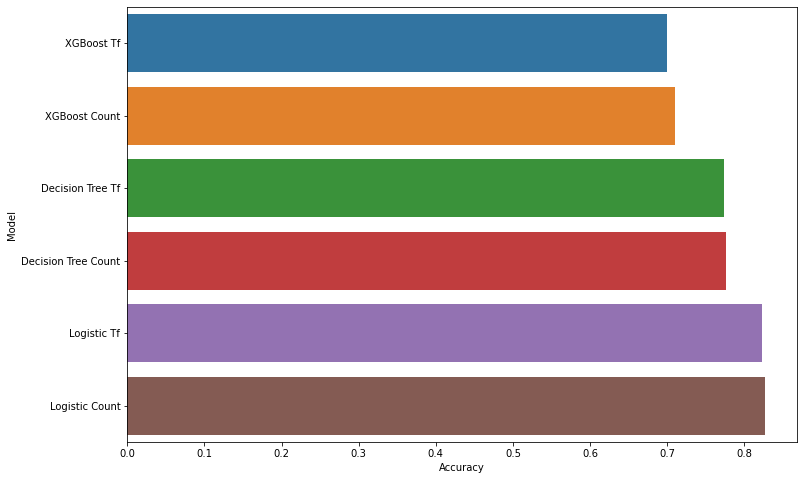

In [93]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "Decision Tree Count","Decision Tree Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, xgb_accuracy_count, xgb_accuracy_tf, dsc_accuracy_count,dsc_accuracy_tf]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)